# Regression

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kc_house_data.csv")

# EDA

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [8]:
abs(df.corr()["price"]).sort_values(ascending=False) 

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

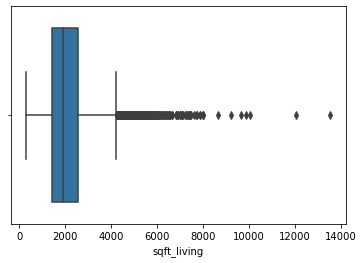

In [10]:
sns.boxplot(df["sqft_living"]);

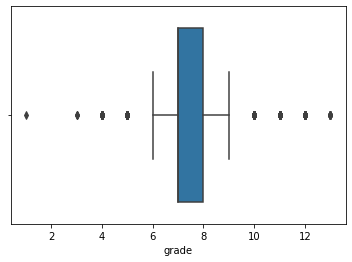

In [11]:
sns.boxplot(df["grade"]);

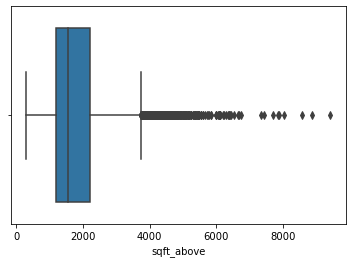

In [12]:
sns.boxplot(df["sqft_above"]);

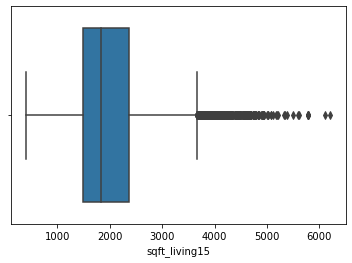

In [13]:
sns.boxplot(df["sqft_living15"]);

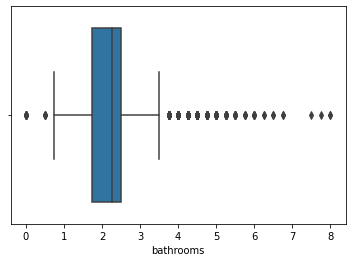

In [14]:
sns.boxplot(df["bathrooms"]);

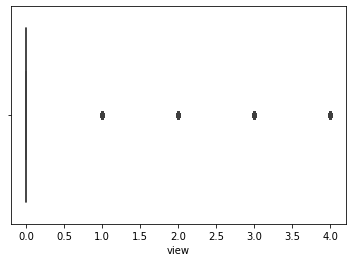

In [15]:
sns.boxplot(df["view"]);

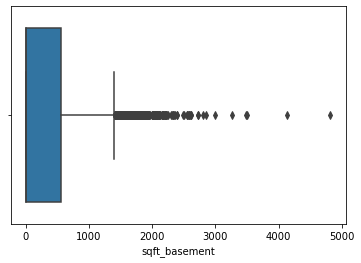

In [16]:
sns.boxplot(df["sqft_basement"]);

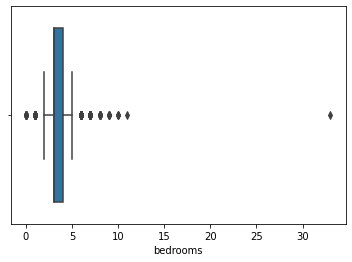

In [17]:
sns.boxplot(df["bedrooms"]);

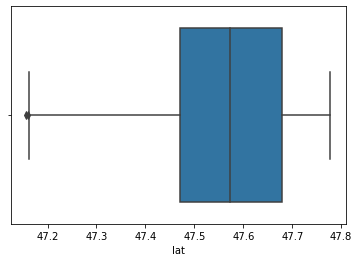

In [18]:
sns.boxplot(df["lat"]);

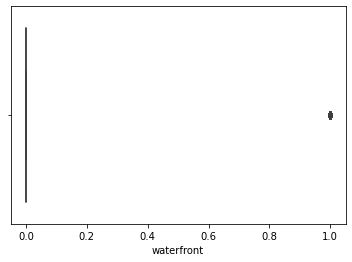

In [19]:
sns.boxplot(df["waterfront"]);

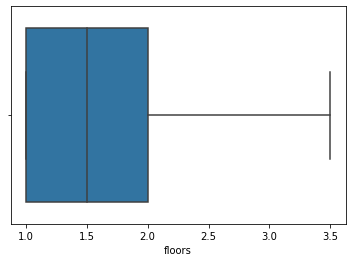

In [20]:
sns.boxplot(df["floors"]);

In [21]:
df["zipcode"]=df["zipcode"].astype("category")

In [22]:
pd.get_dummies(df,drop_first=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21613 non-null  int64   
 1   date           21613 non-null  object  
 2   price          21613 non-null  float64 
 3   bedrooms       21613 non-null  int64   
 4   bathrooms      21613 non-null  float64 
 5   sqft_living    21613 non-null  int64   
 6   sqft_lot       21613 non-null  int64   
 7   floors         21613 non-null  float64 
 8   waterfront     21613 non-null  int64   
 9   view           21613 non-null  int64   
 10  condition      21613 non-null  int64   
 11  grade          21613 non-null  int64   
 12  sqft_above     21613 non-null  int64   
 13  sqft_basement  21613 non-null  int64   
 14  yr_built       21613 non-null  int64   
 15  yr_renovated   21613 non-null  int64   
 16  zipcode        21613 non-null  category
 17  lat            21613 non-null  

In [24]:
abs(df.corr()["price"]).sort_values(ascending=False) 

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [25]:
df["yas"]=2021-df["yr_built"]
df = df[df["sqft_living15"]<3500]
df = df[df["sqft_living"]<4000]
df = df[df["bathrooms"]<4]
df = df[df["sqft_above"]<3750]
df = df[df["bedrooms"]<8]
df = df[df["yas"]<65]

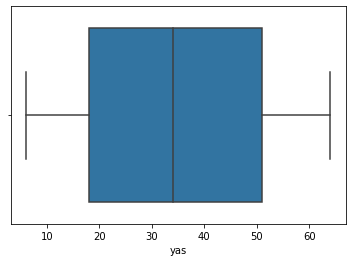

In [26]:
sns.boxplot(df["yas"]);

In [27]:
x=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","bedrooms","waterfront","floors","zipcode"]]
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,waterfront,floors,zipcode
3,1960,7,1050,1360,3.00,0,910,4,0,1.0,98136
4,1680,8,1680,1800,2.00,0,0,3,0,1.0,98074
6,1715,7,1715,2238,2.25,0,0,3,0,2.0,98003
7,1060,7,1060,1650,1.50,0,0,3,0,1.0,98198
8,1780,7,1050,1780,1.00,0,730,3,0,1.0,98146


In [28]:
x["bathrooms"]=x["bathrooms"]**2
x["bedrooms"]=x["bedrooms"]**3
x["sqft_living"]=x["sqft_living"]**2
x["waterfront"]=x["waterfront"]**2
x["sqft_above"] = x["sqft_above"]**2
x["sqft_living15"]=x["sqft_living15"]**2

In [29]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,waterfront,floors,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3,3841600,7,1102500,1849600,9.0000,0,910,64,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2822400,8,2822400,3240000,4.0000,0,0,27,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,2941225,7,2941225,5008644,5.0625,0,0,27,0,2.0,...,0,0,0,0,0,0,0,0,0,0
7,1123600,7,1123600,2722500,2.2500,0,0,27,0,1.0,...,0,0,0,0,0,0,0,0,1,0
8,3168400,7,1102500,3168400,1.0000,0,730,27,0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
y=df["price"]

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=13)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9649, 79), (4136, 79), (9649,), (4136,))

In [34]:
sonuc = LinearRegression().fit(x_train,y_train).predict(x_test)
sonuc

array([527097.30032591, 612121.23783925, 754072.82779864, ...,
       368095.40752721, 769966.56327536, 318468.73935366])

In [35]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train)

In [36]:
y_pretest=regmodel.predict(x_test)
y_pretest

array([527097.30032591, 612121.23783925, 754072.82779864, ...,
       368095.40752721, 769966.56327536, 318468.73935366])

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
(mean_squared_error(y_test,y_pretest))**0.5

99932.16424818189

In [39]:
df.shape

(13785, 22)

In [40]:
r2_score(y_test,y_pretest)

0.8206992410768279

In [41]:
from sklearn.linear_model import Ridge, Lasso

In [42]:
#Ridge R.
R=Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test)

In [43]:
(mean_squared_error(y_test,y_pred_ridge))**0.5


100439.14783437173

In [44]:
r2_score(y_test,y_pred_ridge) 

0.8188753412472884

In [45]:
#Lasso R.
L=Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)

In [46]:
(mean_squared_error(y_test,y_pred_lasso))**0.5


99933.66502628029

In [47]:
r2_score(y_test,y_pred_lasso) 

0.8206938555700766

In [48]:
# Elastic Net
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.8)

In [49]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [50]:
(mean_squared_error(y_test,y_pred_elastic))**0.5

156838.57037320506

In [51]:
r2_score(y_test,y_pred_elastic) 

0.5583509592942117